<a href="https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/04_code_landmarks_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Introspection for Signaling Emergent Cyber-Social Operations (SIGNAL) 

## `Code Landmarks Detection`

**In support of DARPA AIE Hybrid AI to Protect Integrity of Open-Source Code (SocialCyber)**

This project is under the GPL3 License. See the [LICENSE](https://www.gnu.org/licenses/gpl-3.0.en.html) file for the full license text.

**Copyright 2022 SRI International.**

## Setup

In [ ]:
# Install the SIGNAL API
!curl https://signal.cta.sri.com/client | tar xz
!pip install ./signal_api_client
!mkdir -p data

In [ ]:
%matplotlib inline

In [ ]:
from signal_api import signal
import signal_api.util.plots as plot_utils
from sqlalchemy.orm import Session
signal.login()
session = Session(signal.database.engine)

linux = signal.projects(session)[0]

username?: ··········
password?: ··········


In [ ]:
import pandas as pd
from datetime import datetime
from signal_api.util.data import pd_parse_datetime

In [ ]:
linux_2020_history = linux.git_history(datetime(2020, 1, 1), datetime(2020, 12, 31))

## Author Reputation

In [ ]:
DATE_MIN = datetime(2020, 8, 1)
DATE_MAX = datetime(2020, 9, 1)

In [ ]:
linux_commit_history = linux.git_history(DATE_MIN, DATE_MAX)

In [ ]:
authors_df = linux_commit_history.analyze_authors_df()
pd_parse_datetime(authors_df, "u_time_from")
pd_parse_datetime(authors_df, "u_time_to")
authors_df.head()

,u_time_from,u_time_to,name,reputation,edit_longevity,commits,quality_commits,important_commits,touched_files,additions,deletions
0,2020-08-01 00:00:44+00:00,2020-08-08 00:00:44+00:00,Yousuk Seung,0.000000,0.731059,1,1,1,4,9,3
1,2020-08-01 00:00:44+00:00,2020-08-08 00:00:44+00:00,Jason Wang,0.823712,5.402236,7,5,7,8,120,70
2,2020-08-01 00:00:44+00:00,2020-08-08 00:00:44+00:00,Roopa Prabhu,0.000000,0.731059,1,1,1,4,147,5
3,2020-08-01 00:00:44+00:00,2020-08-08 00:00:44+00:00,Hyun Kwon,0.000000,0.731059,1,1,1,1,16,13
4,2020-08-01 00:00:44+00:00,2020-08-08 00:00:44+00:00,'Andy Shevchenko',0.940069,5.647412,9,7,9,7,39,60


In [ ]:
# EXTRA - save/load authors df
authors_df.to_csv("data/authors.csv")

In [ ]:
authors_df = pd.read_csv("data/authors.csv")

In [ ]:
# plot commits by each author
plot_utils.histogram(authors_df,
                     x_axis="name",
                     y_axes=["commits"],
                     x_label="Author name",
                     title="Number of commits by each author")

In [ ]:
# plot adds/deletes by each author
plot_utils.histogram(authors_df,
                     x_axis="name",
                     y_axes=["additions", "deletions"],
                     x_label="Author name",
                     title="Number of adds and deletes by each author")

## Contribution Series

In [ ]:
contribution_series_2020_df = linux_2020_history.histogram_df()
pd_parse_datetime(contribution_series_2020_df, "u_time")

In [ ]:
contribution_series_2020_df.head()

,u_time,time_period,authors,commits,new_func_growth,small_changes,medium_changes,big_changes,important_changes,tedious_changes,quality_changes,new_funcs,cleanup,bug_fixes,triggers
0,2020-01-02 09:27:47+00:00,2020-00,202,642,241,0,466,176,634,336,502,108,29,505,0
1,2020-01-05 23:16:01+00:00,2020-01,459,1641,727,0,1188,453,1607,713,1192,349,103,1189,0
2,2020-01-13 05:15:27+00:00,2020-02,543,1923,957,0,1367,556,1877,823,1373,437,111,1375,0
3,2020-01-19 23:48:33+00:00,2020-03,479,1690,760,0,1186,504,1649,737,1155,289,111,1290,0
4,2020-01-27 07:54:30+00:00,2020-04,303,996,437,0,711,285,968,511,715,164,64,768,0


In [ ]:
for col in contribution_series_2020_df.columns[2:]:
    stats_min = contribution_series_2020_df[col].min()
    stats_max = contribution_series_2020_df[col].max()
    stats_mean = contribution_series_2020_df[col].mean()
    print(f"- Processed {col}")
    print(f"\tsum: {contribution_series_2020_df[col].sum()}")
    print(f"\tmin: {stats_min}")
    print(f"\tmean: {stats_mean}")
    print(f"\tmax: {stats_max}")

- Processed authors
	sum: 22969
	min: 121
	mean: 433.37735849056605
	max: 616
- Processed commits
	sum: 83604
	min: 308
	mean: 1577.433962264151
	max: 2389
- Processed new_func_growth
	sum: 38476
	min: 163
	mean: 725.9622641509434
	max: 1152
- Processed small_changes
	sum: 0
	min: 0
	mean: 0.0
	max: 0
- Processed medium_changes
	sum: 61114
	min: 248
	mean: 1153.0943396226414
	max: 1737
- Processed big_changes
	sum: 22490
	min: 60
	mean: 424.33962264150944
	max: 697
- Processed important_changes
	sum: 82066
	min: 304
	mean: 1548.4150943396226
	max: 2340
- Processed tedious_changes
	sum: 38250
	min: 99
	mean: 721.6981132075472
	max: 1174
- Processed quality_changes
	sum: 59704
	min: 231
	mean: 1126.4905660377358
	max: 1642
- Processed new_funcs
	sum: 16450
	min: 87
	mean: 310.37735849056605
	max: 488
- Processed cleanup
	sum: 4455
	min: 10
	mean: 84.05660377358491
	max: 146
- Processed bug_fixes
	sum: 62689
	min: 211
	mean: 1182.811320754717
	max: 1796
- Processed triggers
	sum: 0
	min: 

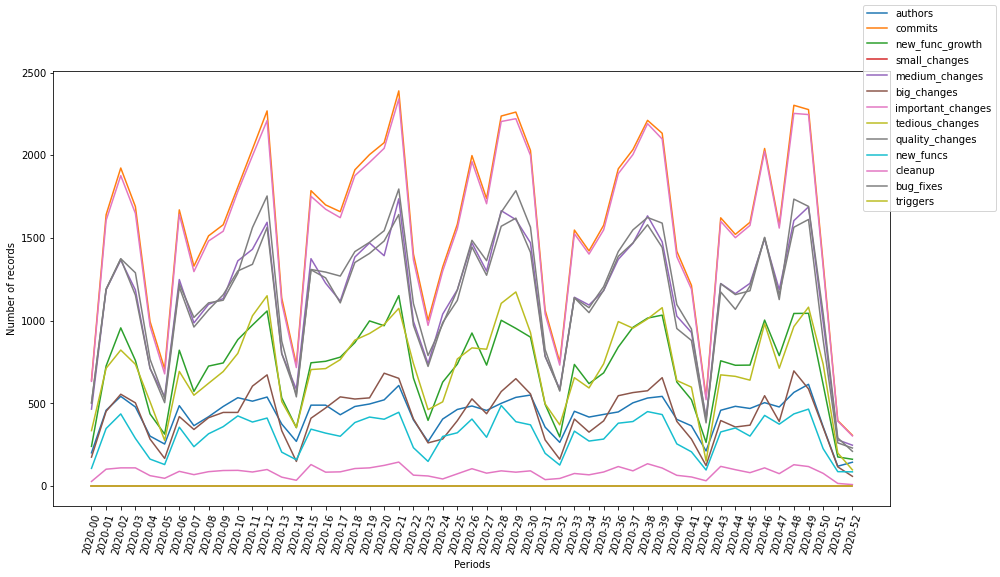

In [ ]:
plot_options = {
    'x_label':'Periods',
    'y_label':'Number of records',
    'figsize':(15, 8),
    'xticks_rotation':75,
    'yticks_rotation':0,
}
#signal.plot_data(contribution_series_2020_df, plot_options)
plot_utils.multiple_line_plot(contribution_series_2020_df, "time_period", contribution_series_2020_df.columns[2:], **plot_options)

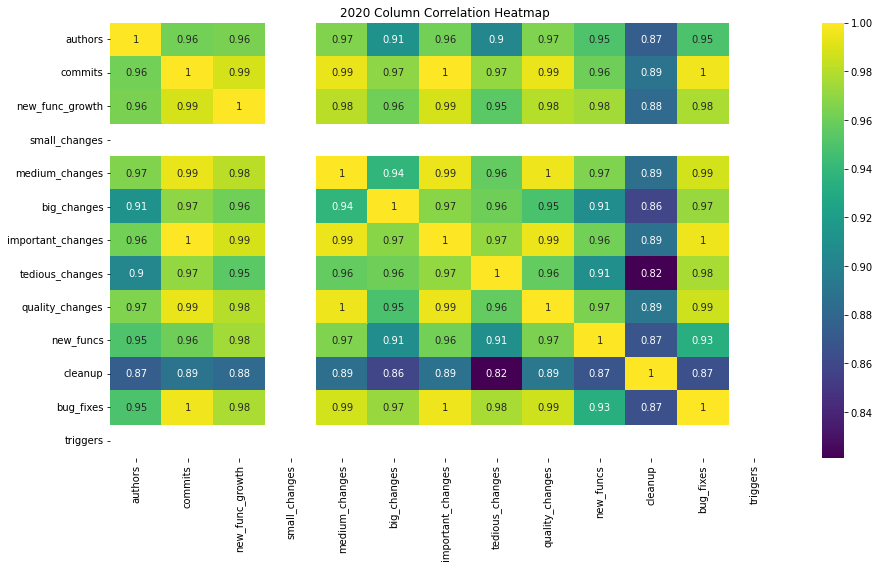

In [ ]:
# correlations (heatmap)
plot_options = {
    'annot': True,
    'cmap':'viridis',
    'title':'2020 Column Correlation Heatmap',
    'figsize':(15, 8),
    'xticks_rotation':45,
}
plot_utils.landmark_heatmap(contribution_series_2020_df, **plot_options)

## Changepoints

In [ ]:
from signal_api.util.data import pelt, major_landmarks

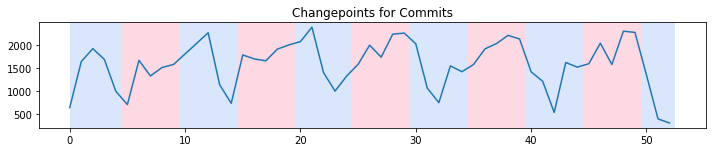

In [ ]:
# find interesting changepoints (code landmarks) and then plot them
# e.g., only on commits
_, changepoints_df = pelt(contribution_series_2020_df, "commits", y_label="Changepoints for Commits")

 ## Major Landmarks


In [ ]:
major_codelmark_df = major_landmarks(contribution_series_2020_df, "quality_changes")

In [ ]:
major_codelmark_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 21 to 21
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   u_time             1 non-null      datetime64[ns, UTC]
 1   time_period        1 non-null      object             
 2   authors            1 non-null      int64              
 3   commits            1 non-null      int64              
 4   new_func_growth    1 non-null      int64              
 5   small_changes      1 non-null      int64              
 6   medium_changes     1 non-null      int64              
 7   big_changes        1 non-null      int64              
 8   important_changes  1 non-null      int64              
 9   tedious_changes    1 non-null      int64              
 10  quality_changes    1 non-null      int64              
 11  new_funcs          1 non-null      int64              
 12  cleanup            1 non-null      int64            

# Developer behavior alignment via a multimodal joint representation of developer activities and our version of the Smith-Waterman algorithm 

In [ ]:
df_factors = pd.read_csv("data/df_factors.csv")
pd_parse_datetime(df_factors, "sent_time", unit=None)
df_factors.head()

,sender_id,sent_time,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response
0,0,2020-08-20 09:35:52+00:00,0.859261,0.013534,0.012611,0.228412,0.258722
1,0,2020-08-20 09:35:55+00:00,0.897292,0.009481,0.090553,0.190483,0.241613
2,0,2020-08-20 09:36:02+00:00,0.858517,0.009132,0.070129,0.305459,0.245373
3,0,2020-08-20 09:36:06+00:00,0.842542,0.008300,0.068469,0.217217,0.241429
4,0,2020-08-20 09:36:09+00:00,0.850966,0.010151,0.090245,0.279914,0.251299


In [ ]:
fused_vectors = linux_2020_history.fuse(
    df_factors[:5000],
    time_column="sent_time",
    keep_columns=["sender_id", "sent_time"],
    factor_columns=df_factors.columns[2:]
)
fused_vectors.to_csv("data/fused_vectors.csv")
fused_vectors.to_pickle("data/fused_vectors.pickle")

In [ ]:
fused_vectors = pd.read_pickle("data/fused_vectors.pickle")
fused_vectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   sender_id   5000 non-null   int64              
 1   sent_time   5000 non-null   datetime64[ns, UTC]
 2   input_vec   5000 non-null   object             
 3   input_l2    5000 non-null   float64            
 4   commit_vec  5000 non-null   object             
 5   commit_l2   5000 non-null   float64            
 6   fused_vec   5000 non-null   object             
 7   fused_l2    5000 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 351.6+ KB


In [ ]:
from signal_api.vector.alignment import align_df
report = align_df(
    input_df=fused_vectors[:2000],
    start_time=datetime(2020, 8, 21),
    end_time=datetime(2020, 8, 22),
    target_column="sender_id",
    target_value=0,
    top_k=1,
    visualize=True,
)

## &#128071; What's next?

&#128072; [Installation and Dashboard Visualization](https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/01_installation_and_dashboard.ipynb)

&#128072; [Activity and Role Detection in LKML](https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/02_activity_roles_detection.ipynb)

&#128072; [Activity Evolution Trajectory](https://colab.research.google.com/github/SRI-CSL/signal-public/blob/main/demo/03_activity_evolution_trajectory_aw2v.ipynb)